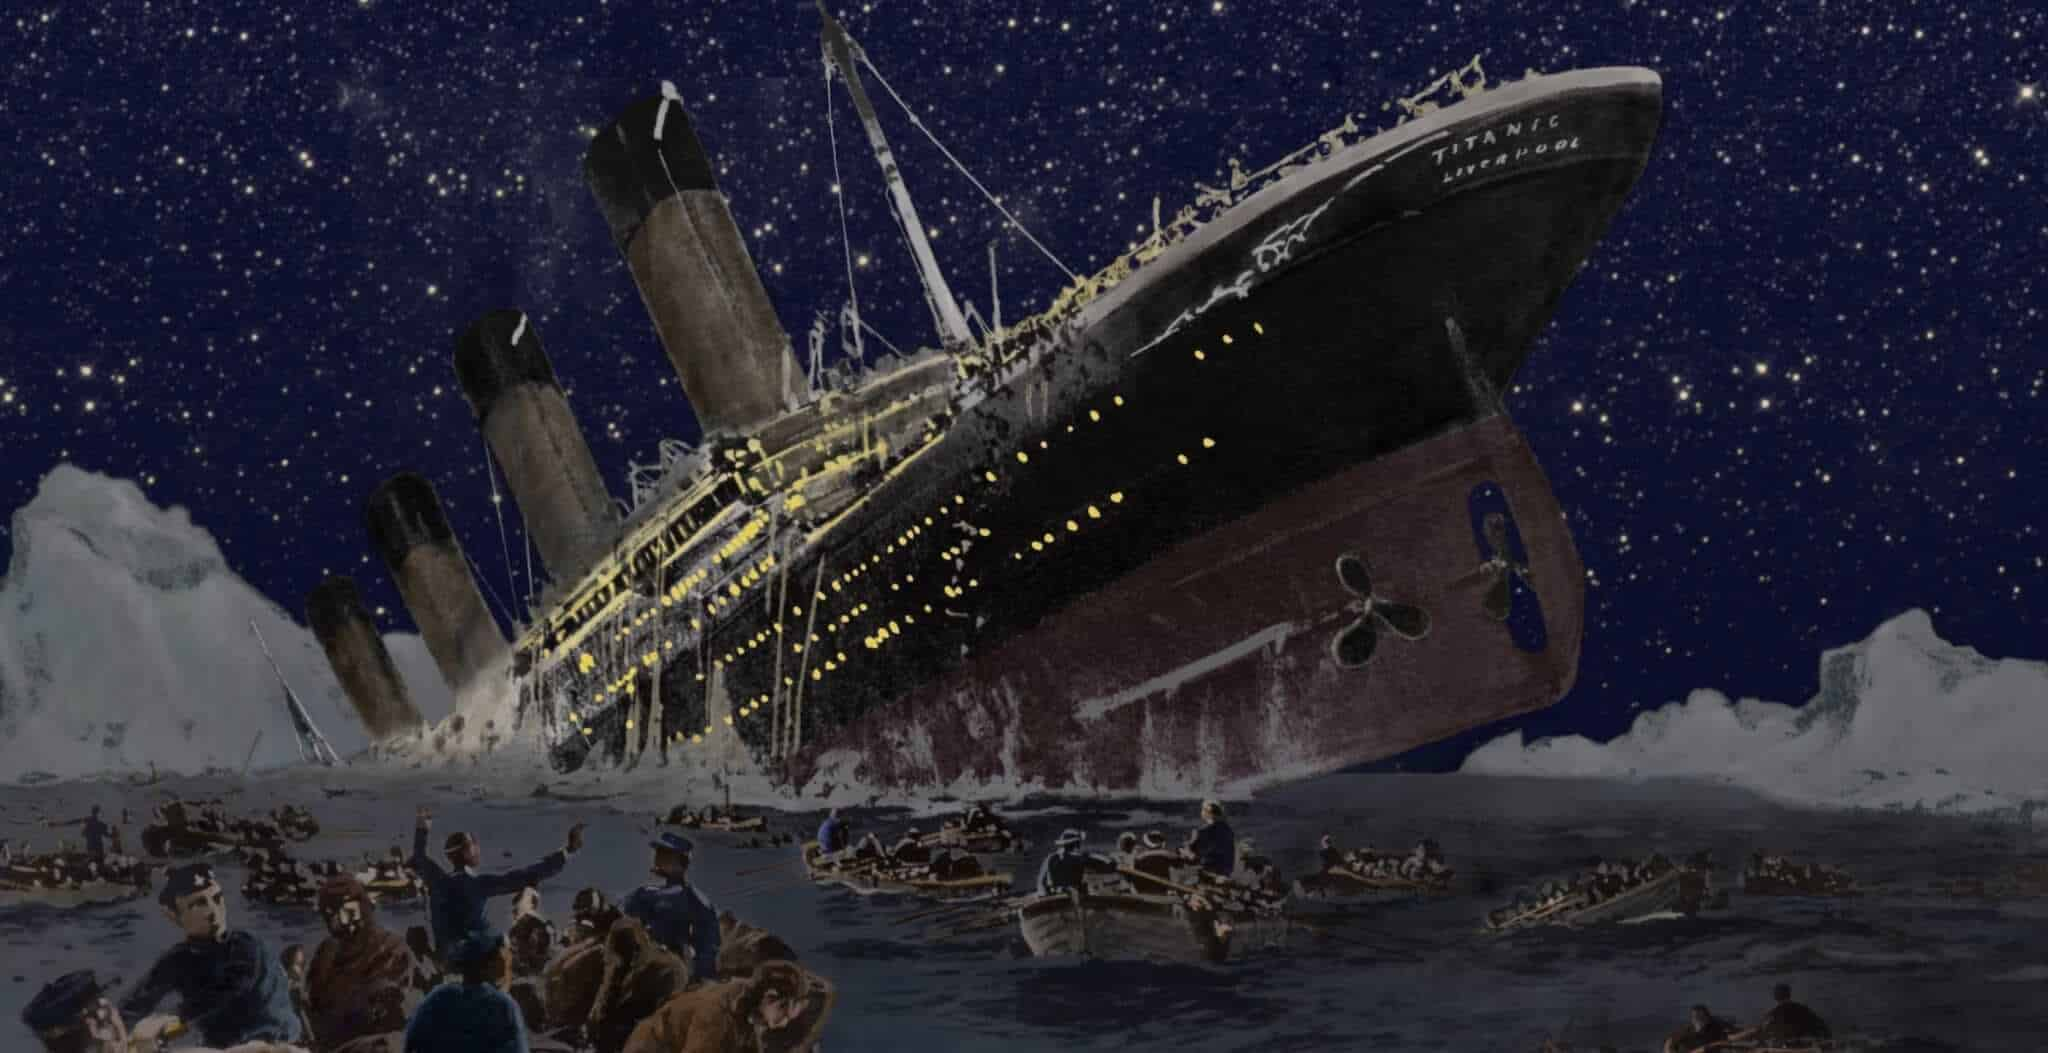

# Overview


The data has been split into two groups:
*	training set (train.csv)
*	test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.


# 1. Concept Study

Following from the overview that was given, the following observations were noted:

1. This is a usupervised learning problem.
2. This is a classification model problem.
3. The provided data requires cleaning.

# 2. Data Preperation

Importing and visualizing raw data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
test.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


From the data in both datasets (test and train), I will drop the columns that I do not need for the prediction model. 
These are, PassengerId,Name, Ticket, Fare and Cabin

In [ ]:

trainData1 = train.drop(["PassengerId","Name","Ticket","Fare","Cabin"], axis = 1 )
testData1 = test.drop(["PassengerId","Name","Ticket","Fare","Cabin"], axis = 1 )


Categorical data may be problematic when passing through a model, thus, it is wise to convert the existing categorical data in the data table to numerical form. This is done below for both "Sex" and "Embarked" columns.

For train data:


In [ ]:
genderData = pd.get_dummies(trainData1.Sex)
trainData = trainData1.drop(["Sex"], axis = 1)
trainData = pd.concat((trainData, genderData), axis = 1)
trainData

,Survived,Pclass,Age,SibSp,Parch,Embarked,female,male
0,0,3,22.0,1,0,S,0,1
1,1,1,38.0,1,0,C,1,0
2,1,3,26.0,0,0,S,1,0
3,1,1,35.0,1,0,S,1,0
4,0,3,35.0,0,0,S,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,0,1
887,1,1,19.0,0,0,S,1,0
888,0,3,NaN,1,2,S,1,0
889,1,1,26.0,0,0,C,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(trainData['Embarked'])
trainData.drop("Embarked", axis=1, inplace=True)
trainData["Embarked"] = label
trainData

,Survived,Pclass,Age,SibSp,Parch,female,male,Embarked
0,0,3,22.0,1,0,0,1,2
1,1,1,38.0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,2
3,1,1,35.0,1,0,1,0,2
4,0,3,35.0,0,0,0,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,0,1,2
887,1,1,19.0,0,0,1,0,2
888,0,3,NaN,1,2,1,0,2
889,1,1,26.0,0,0,0,1,0


for test data:

In [ ]:
genderData_test = pd.get_dummies(testData1.Sex)
testData = testData1.drop(["Sex"], axis = 1)
testData = pd.concat((testData, genderData_test), axis = 1)
testData

,Pclass,Age,SibSp,Parch,Embarked,female,male
0,3,34.5,0,0,Q,0,1
1,3,47.0,1,0,S,1,0
2,2,62.0,0,0,Q,0,1
3,3,27.0,0,0,S,0,1
4,3,22.0,1,1,S,1,0
...,...,...,...,...,...,...,...
413,3,NaN,0,0,S,0,1
414,1,39.0,0,0,C,1,0
415,3,38.5,0,0,S,0,1
416,3,NaN,0,0,S,0,1


In [ ]:
le = LabelEncoder()
label = le.fit_transform(testData['Embarked'])
testData.drop("Embarked", axis=1, inplace=True)
testData["Embarked"] = label
testData

,Pclass,Age,SibSp,Parch,female,male,Embarked
0,3,34.5,0,0,0,1,1
1,3,47.0,1,0,1,0,2
2,2,62.0,0,0,0,1,1
3,3,27.0,0,0,0,1,2
4,3,22.0,1,1,1,0,2
...,...,...,...,...,...,...,...
413,3,NaN,0,0,0,1,2
414,1,39.0,0,0,1,0,0
415,3,38.5,0,0,0,1,2
416,3,NaN,0,0,0,1,2


After having dropped the columns I do not need, the data is left with no missing/error entries. 

From here, We can analyze and interprete the data.

In [ ]:
import numpy as np
testData.replace([np.inf, -np.inf], np.nan, inplace=True)
trainData.replace([np.inf, -np.inf], np.nan, inplace=True)

testData.dropna(inplace=True)
trainData.dropna(inplace=True)
trainData

,Survived,Pclass,Age,SibSp,Parch,female,male,Embarked
0,0,3,22.0,1,0,0,1,2
1,1,1,38.0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,2
3,1,1,35.0,1,0,1,0,2
4,0,3,35.0,0,0,0,1,2
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,1,0,1
886,0,2,27.0,0,0,0,1,2
887,1,1,19.0,0,0,1,0,2
889,1,1,26.0,0,0,0,1,0


# Analyzing and Interpreting the data (Descriptive analysis).

In [247]:
import seaborn as sns

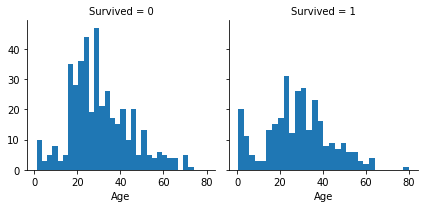

In [252]:
Visual = sns.FacetGrid(trainData, col='Survived')
Visual.map(plt.hist, 'Age', bins=30)

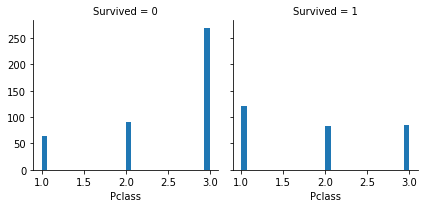

In [256]:
Visual = sns.FacetGrid(trainData, col='Survived')
Visual.map(plt.hist, 'Pclass', bins=30)

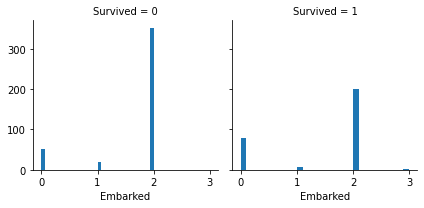

In [257]:
Visual = sns.FacetGrid(trainData, col='Survived')
Visual.map(plt.hist, 'Embarked', bins=30)

# Model planning



This is a supervised learning classisfiaction problem. After having researched the most widely used models for classification problems, decission tree, random forest and Naive Bayes, amongst others, came on top of the mosels that generally perfoms well with classification predictions

In [ ]:
Y_train = trainData["Survived"]
X_train = trainData.drop("Survived", axis = 1)
X_test = testData

Y_train.shape, X_train.shape, X_test.shape

((714,), (714, 7), (332, 7))

# Building the models


1.   Decision Tree model
2.   Random Forest model
3.   Gaussian Naive Bayes




a) Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)
Y_pred = decisionTree.predict(X_test)


b) Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train, Y_train)
Y_pred = randomForest.predict(X_test)
randomForest.score(X_train, Y_train)


0.9439775910364145

c) Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)


# Model accuracy evaluation

In [ ]:
scoreDecisionTree = round(decisionTree.score(X_train, Y_train) * 100, 2)
scoreDecisionTree

94.54

In [ ]:
scoreRandomForest = round(randomForest.score(X_train, Y_train) * 100, 2)
scoreRandomForest

94.4

In [ ]:
scoreGaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
scoreGaussian

77.87

# Evaluating the models

In [ ]:
allModels = pd.DataFrame({
    'Model': ['Decision Tree', "Random Forest", "Gaussian Naive Bayes"],
    'Score': [scoreDecisionTree,scoreRandomForest,scoreGaussian  ]})
allModels.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,94.54
1,Random Forest,94.40
2,Gaussian Naive Bayes,77.87


# The choosen model and why

From the three models that have been tested, evaluated and whose accuracy scores have been presented above. Decision tree and Random Forest appear to perfom better than the Gaussian Naive Bayes model as depicted in the figure above.

Although Decission Tree scored slightly higher, the recomended model for this prediction should be the Random Forest model for the following reasons:


*   Lower risk of overfitting
*   Works well with non-linear data
*   Robust to outliers
*   Accuracy is higher than most models



# Recomendations

Incomporate the use of deep learning algorythms to observe how they compare to the above tested models.

Test more models